In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [2]:
# Reading all the text files in csv
PS1 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\PS1.txt",delimiter="\t", header=None)
PS2 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\PS2.txt",delimiter="\t", header=None)
PS3 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\PS3.txt",delimiter="\t", header=None)
PS4 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\PS4.txt",delimiter="\t", header=None)
PS5 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\PS5.txt",delimiter="\t", header=None)
PS6 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\PS6.txt",delimiter="\t", header=None)
EPS1 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\EPS1.txt",delimiter="\t", header=None)
FS1 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\FS1.txt",delimiter="\t", header=None)
FS2 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\FS2.txt",delimiter="\t", header=None)
TS1 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\TS1.txt",delimiter="\t", header=None)
TS2 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\TS2.txt",delimiter="\t", header=None)
TS3 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\TS3.txt",delimiter="\t", header=None)
TS4 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\TS4.txt",delimiter="\t", header=None)
VS1 = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\VS1.txt",delimiter="\t", header=None)
CE = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\CE.txt",delimiter="\t", header=None)
CP = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\CP.txt",delimiter="\t", header=None)
SE = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\SE.txt",delimiter="\t", header=None)
Target = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\Jobs\\AB InBev\\data\\Text Files\\profile.txt",delimiter="\t", header=None)
Target.columns = ['Cooler_Condition', 'Valve_Condition', 'Internal_Pump_Leakage', 'Hydraulic_accumulator', 'Stable_Flag']

In [3]:
# Selecting the Target Cooler Condition and dropping all the others
Target = Target.drop(['Valve_Condition', 'Internal_Pump_Leakage', 'Hydraulic_accumulator', 'Stable_Flag'], axis=1)

In [4]:
# Putting all the sensor data based on equal sampling rates into different lists
sensor_sampling_100 = [PS1, PS2, PS3, PS4, PS5, PS6, EPS1]
sensor_sampling_10 = [FS1, FS2]
sensor_sampling_1 = [TS1, TS2, TS3, TS4, VS1, CE, CP, SE]

In [5]:
# Aggregating data for all the sensors (with all sampling rates) for every 10 seconds to reduce the dimensionality of the data
new_sensor_sampling_100 = []
for df in sensor_sampling_100:
    newdf = df.groupby(np.arange(len(df.columns))//1000, axis=1).mean()
    new_sensor_sampling_100.append(newdf)
new_sensor_sampling_100 = pd.concat(new_sensor_sampling_100, axis=1)

new_sensor_sampling_10 = []
for df in sensor_sampling_10:
    newdf = df.groupby(np.arange(len(df.columns))//100, axis=1).mean()
    new_sensor_sampling_10.append(newdf)
new_sensor_sampling_10 = pd.concat(new_sensor_sampling_10, axis=1)

new_sensor_sampling_1 = []
for df in sensor_sampling_1:
    newdf = df.groupby(np.arange(len(df.columns))//10, axis=1).mean()
    new_sensor_sampling_1.append(newdf)
new_sensor_sampling_1 = pd.concat(new_sensor_sampling_1, axis=1)

In [6]:
# Combining all the new sensor data (aggregated & with reduced dimensionality) together along with the Target (Cooler Condition)
frames1 = [new_sensor_sampling_100, new_sensor_sampling_10, new_sensor_sampling_1, Target]
new_sensordata = pd.concat(frames1, axis=1)
new_sensordata.head()

,0,1,2,3,4,5,0,1,2,3,...,3,4,5,0,1,2,3,4,5,Cooler_Condition
0,187.36271,147.02714,157.07028,165.54485,155.86852,151.16745,9.512161,121.12585,131.31226,139.64960,...,1.8158,1.5939,1.4395,13.7180,66.5412,66.0552,69.3919,70.3871,68.8497,3
1,187.88408,147.01517,156.86739,165.28308,155.66950,150.90070,9.566112,121.08698,131.12716,139.48404,...,1.2116,1.1903,1.1713,13.3979,66.3887,66.2618,69.8939,70.9587,69.1127,3
2,187.77325,146.75526,156.55951,165.08761,155.33551,150.57518,9.459178,120.90711,130.88463,139.34218,...,1.0883,1.0943,1.1043,13.5915,66.7226,66.5497,69.8913,71.1584,69.3454,3
3,187.67926,146.58436,156.37909,164.92689,155.16391,150.39502,9.399533,120.79783,130.77706,139.27504,...,1.0299,1.0554,1.0930,13.7619,67.3491,66.6569,70.2565,71.2072,69.5378,3
4,187.61161,146.41015,156.18531,164.70941,154.91724,150.16911,9.495656,120.66341,130.61134,139.08130,...,1.0629,1.0748,1.0950,12.8391,66.3922,66.6717,70.2730,71.0880,69.4676,3


In [7]:
# Standardizing the new sensor data for optimal performance using the Standard Scaler Function
X = new_sensordata.iloc[:,0:102]
X = StandardScaler().fit_transform(X)

In [8]:
# Finding the minimum number of components for Principal Component Analysis to have an explained variance of 99%
pca = PCA(0.99)
pca.fit(X)
pca.n_components_

9

In [9]:
# Implementing Principal Component to further reduce the dimensionality of the new sensor data to 9 principal components while 
# retaining 99% of the information (explained variance = 99%)
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.70181871, 0.1655786 , 0.03917047, 0.0377592 , 0.02519704,
       0.00973071, 0.0063977 , 0.00349433, 0.00273778])

In [10]:
# Generating a final dataset of all the 9 principal components along with the Target variable
principalDf = pd.DataFrame(data = principalComponents)
PCA_target = [principalDf, Target]
PCADf = pd.concat(PCA_target, axis=1)
PCADf.head()

,0,1,2,3,4,5,6,7,8,Cooler_Condition
0,-7.938924,-0.186228,-2.470273,1.684633,3.438985,-0.963647,0.823423,0.804753,0.555520,3
1,-5.068223,-1.477608,-1.610854,1.577029,4.261067,-5.559351,3.207626,0.864570,1.509025,3
2,-3.657813,-2.015192,-1.507725,1.524001,4.188235,-6.378478,3.745780,1.134996,1.556150,3
3,-2.718730,-2.354421,-1.534780,1.605465,3.939737,-6.652133,3.892295,0.681387,1.498700,3
4,-1.881476,-2.333541,-0.874969,1.180136,3.820025,-6.412851,3.598980,0.665366,1.435611,3


In [16]:
# Seperating out the data (principal components) from the target variable (Cooling Condition)
array = PCADf.values
X = array[:,0:9]
Y = array[:,9]

In [12]:
# Classification Algorithms
seed = 7
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.995475 (0.012142)
KNN: 0.979636 (0.045440)
SVM: 0.985950 (0.028814)


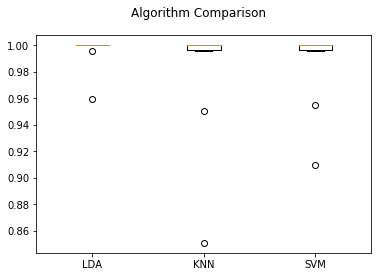

In [13]:
# Classification ALgorithm Comparison using Boxplots
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
kf = KFold(n_splits=10)
for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]

In [18]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train) 
Y_pred = lda.predict(X_test)  
print(confusion_matrix(Y_test,Y_pred))  
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[220]]
             precision    recall  f1-score   support

      100.0       1.00      1.00      1.00       220

avg / total       1.00      1.00      1.00       220

1.0


In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[220]]
             precision    recall  f1-score   support

      100.0       1.00      1.00      1.00       220

avg / total       1.00      1.00      1.00       220

1.0


In [22]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[220]]
             precision    recall  f1-score   support

      100.0       1.00      1.00      1.00       220

avg / total       1.00      1.00      1.00       220

1.0
